- Pandas 라이브러리를 이용하여 트럼프 대통령의 트윗 게시글 수의 증감과 
- 트위터 이용자들의 반응을 분석
- Pandas 라이브러리에서 내장된 plot 함수를 활용하여 분석 결과를 시각화하여 표현
-  비정형 데이터인 트윗 텍스트를 시각화하기 위하여 WordCloud를 생성

- 게시물 수 -> 해당 날짜에 트럼프가 활동한 양
- favorite = 트럼프 트윗에 공감하는 사람의 수

In [1]:
# 분석 라이브러리 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# 경고 문구 미표시
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv('./trumptweets.csv')
df.head(2)

,id,link,content,date,retweets,favorites,mentions,hashtags,geo
0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 20:54:25,500,868,NaN,NaN,NaN
1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10,33,273,NaN,NaN,NaN


In [3]:
# 기본 정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41122 entries, 0 to 41121
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         41122 non-null  int64  
 1   link       41122 non-null  object 
 2   content    41122 non-null  object 
 3   date       41122 non-null  object 
 4   retweets   41122 non-null  int64  
 5   favorites  41122 non-null  int64  
 6   mentions   22467 non-null  object 
 7   hashtags   5810 non-null   object 
 8   geo        0 non-null      float64
dtypes: float64(1), int64(3), object(5)
memory usage: 2.8+ MB


In [4]:
# 결측값 확인
df.isnull().sum()

id               0
link             0
content          0
date             0
retweets         0
favorites        0
mentions     18655
hashtags     35312
geo          41122
dtype: int64

In [5]:
# 중복데이터 확인
df.duplicated().sum()

0

In [6]:
# columns 속성으로, 변수(컬럼)들의 이름을 확인할 수 있음. 
df.columns

Index(['id', 'link', 'content', 'date', 'retweets', 'favorites', 'mentions',
       'hashtags', 'geo'],
      dtype='object')

In [7]:
# dropna 함수를 이용하여 결측이 1개 이상이면(how='any'), 해당 변수(컬럼)를 제거.
df = df.dropna(how='any', axis=1)

# 잘 제거되었는지 확인합니다.
print(df.columns)

Index(['id', 'link', 'content', 'date', 'retweets', 'favorites'], dtype='object')


In [8]:
# loc 인덱서를 사용하여 'content' 컬럼부터 슬라이싱 기법으로 선택.
df_cleaned = df.loc[:, 'content':]

# 첫 5행을 출력합니다. 
df_cleaned.head()

,content,date,retweets,favorites
0,Be sure to tune in and watch Donald Trump on L...,2009-05-04 20:54:25,500,868
1,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10,33,273
2,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 15:38:08,12,18
3,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 22:40:15,11,24
4,"""My persona will never be that of a wallflower...",2009-05-12 16:07:28,1399,1965


In [9]:
# 변경을 원하는 순서대로 컬럼의 배열을 정리.
new_col_order = ['date', 'content', 'retweets', 'favorites']

# 새로운 컬럼의 배열을 이용하여 데이터프레임을 새롭게 구성.
df_cleaned = df_cleaned[new_col_order]

# 첫 5행을 출력합니다. 
df_cleaned.head()

,date,content,retweets,favorites
0,2009-05-04 20:54:25,Be sure to tune in and watch Donald Trump on L...,500,868
1,2009-05-05 03:00:10,Donald Trump will be appearing on The View tom...,33,273
2,2009-05-08 15:38:08,Donald Trump reads Top Ten Financial Tips on L...,12,18
3,2009-05-08 22:40:15,New Blog Post: Celebrity Apprentice Finale and...,11,24
4,2009-05-12 16:07:28,"""My persona will never be that of a wallflower...",1399,1965


In [10]:
# date컬럼을 datetime자료형으로 변경
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41122 entries, 0 to 41121
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       41122 non-null  datetime64[ns]
 1   content    41122 non-null  object        
 2   retweets   41122 non-null  int64         
 3   favorites  41122 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 1.3+ MB


In [11]:
df_cleaned['year'] = df_cleaned['date'].dt.year
df_cleaned['month'] = df_cleaned['date'].dt.month
df_cleaned.head()

,date,content,retweets,favorites,year,month
0,2009-05-04 20:54:25,Be sure to tune in and watch Donald Trump on L...,500,868,2009,5
1,2009-05-05 03:00:10,Donald Trump will be appearing on The View tom...,33,273,2009,5
2,2009-05-08 15:38:08,Donald Trump reads Top Ten Financial Tips on L...,12,18,2009,5
3,2009-05-08 22:40:15,New Blog Post: Celebrity Apprentice Finale and...,11,24,2009,5
4,2009-05-12 16:07:28,"""My persona will never be that of a wallflower...",1399,1965,2009,5


In [12]:
# value_counts 함수
df_cleaned['year'].value_counts()

2013    8207
2015    7719
2014    5987
2019    4588
2012    4190
2016    3951
2018    2998
2017    2232
2011     870
2020     181
2010     143
2009      56
Name: year, dtype: int64

In [13]:
# sort_index 함수를 사용하고, 오름차순 정렬. (ascending=True)
df_cleaned['year'].value_counts().sort_index()

2009      56
2010     143
2011     870
2012    4190
2013    8207
2014    5987
2015    7719
2016    3951
2017    2232
2018    2998
2019    4588
2020     181
Name: year, dtype: int64

<Axes: >

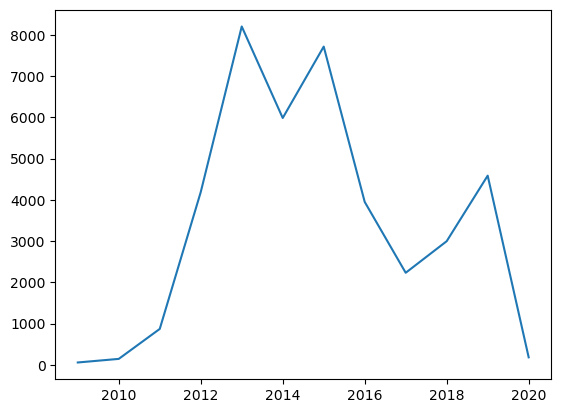

In [14]:
# plot 함수는 기본값으로 선 그래프를 출력. (kind='line')
df_cleaned['year'].value_counts().sort_index().plot()

<Axes: >

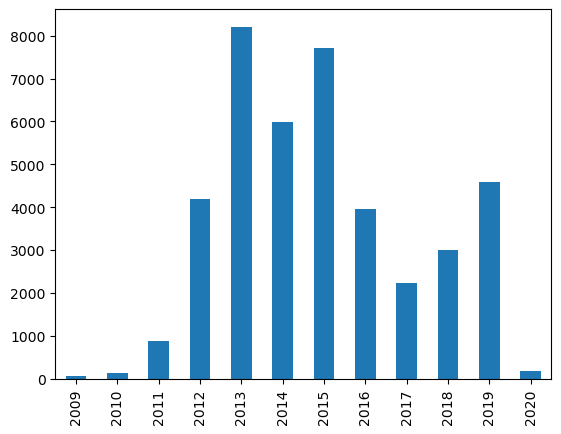

In [15]:
# plot 함수의 옵션을 적용하여 막대 그래프를 출력. (kind='bar')
df_cleaned['year'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='year'>

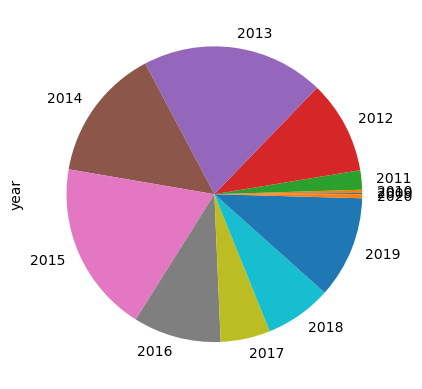

In [16]:
# plot 함수의 옵션을 적용하여 원 그래프(Pie Chart)를 출력. (kind='pie')
df_cleaned['year'].value_counts().sort_index().plot(kind='pie')

In [17]:
# sort_value 함수를 사용하여 retweets 변수의 데이터 크기 순으로 정렬.(내림차순)(ascending=False)
df_cleaned.sort_values(by='retweets', ascending=False)

,date,content,retweets,favorites,year,month
32059,2017-07-02 15:21:42,# FraudNewsCNN # FNNpic.twitter.com/WYUnHjjUjg,309892,528265,2017,7
30895,2016-11-08 12:43:14,TODAY WE MAKE AMERICA GREAT AGAIN!,295817,518347,2016,11
15535,2014-06-04 12:23:11,Are you allowed to impeach a president for gro...,246232,237843,2014,6
38625,2019-08-02 19:41:30,A$AP Rocky released from prison and on his way...,240363,857678,2019,8
33061,2017-11-12 01:48:01,Why would Kim Jong-un insult me by calling me ...,229531,559317,2017,11
...,...,...,...,...,...,...
10747,2013-08-01 12:36:26,@ ccalder0811 Thank you.,0,0,2013,8
8531,2013-04-24 10:49:24,@ RamboFo Great!,0,1,2013,4
6291,2013-02-07 21:29:42,@ bahia6085 Thanks Suz for your comments.,0,0,2013,2
10794,2013-08-02 15:24:36,@ not_that_actor I know!,0,0,2013,8


In [18]:
# 정렬 순으로 상위 5행의 데이터를 추출.
top5_retweets = df_cleaned.sort_values(by='retweets', ascending=False).iloc[:5]
top5_retweets

,date,content,retweets,favorites,year,month
32059,2017-07-02 15:21:42,# FraudNewsCNN # FNNpic.twitter.com/WYUnHjjUjg,309892,528265,2017,7
30895,2016-11-08 12:43:14,TODAY WE MAKE AMERICA GREAT AGAIN!,295817,518347,2016,11
15535,2014-06-04 12:23:11,Are you allowed to impeach a president for gro...,246232,237843,2014,6
38625,2019-08-02 19:41:30,A$AP Rocky released from prison and on his way...,240363,857678,2019,8
33061,2017-11-12 01:48:01,Why would Kim Jong-un insult me by calling me ...,229531,559317,2017,11


In [19]:
# sort_value 함수를 사용하여 favorites 변수의 데이터 크기 순으로 정렬(내림차순)(ascending=False)
top_1_percent_favorites = df_cleaned.sort_values(by='favorites', ascending=False)
top_1_percent_favorites

,date,content,retweets,favorites,year,month
38625,2019-08-02 19:41:30,A$AP Rocky released from prison and on his way...,240363,857678,2019,8
40959,2020-01-03 03:32:53,pic.twitter.com/VXeKiVzpTf,171742,812508,2020,1
40990,2020-01-08 03:45:24,All is well! Missiles launched from Iran at tw...,158748,766263,2020,1
40868,2019-12-25 13:26:31,MERRY CHRISTMAS!,114052,738868,2019,12
38394,2019-07-19 22:01:47,Just spoke to @ KanyeWest about his friend A$A...,195109,717895,2019,7
...,...,...,...,...,...,...
5591,2013-01-11 21:31:49,@ NormaWilcox Thank you.,0,0,2013,1
6180,2013-02-05 22:42:19,@ festenoc True and thanks.,2,0,2013,2
3552,2012-10-03 21:25:31,@ SiphoSimelane Thank you.,3,0,2012,10
9960,2013-06-27 18:14:20,@ MIbrunette Our country needs the same fix-up.,2,0,2013,6


In [20]:
# 상위 1%에 해당하는 인덱스 값을 계산. 
top_1_percent_index = int(len(top_1_percent_favorites) * 0.01)
top_1_percent_index

411

In [21]:
# 상위 1% 경계에 해당하는 인덱스까지 슬라이싱으로 추출. (iloc)
top_1_percent_favorites = top_1_percent_favorites.iloc[:top_1_percent_index]
top_1_percent_favorites

,date,content,retweets,favorites,year,month
38625,2019-08-02 19:41:30,A$AP Rocky released from prison and on his way...,240363,857678,2019,8
40959,2020-01-03 03:32:53,pic.twitter.com/VXeKiVzpTf,171742,812508,2020,1
40990,2020-01-08 03:45:24,All is well! Missiles launched from Iran at tw...,158748,766263,2020,1
40868,2019-12-25 13:26:31,MERRY CHRISTMAS!,114052,738868,2019,12
38394,2019-07-19 22:01:47,Just spoke to @ KanyeWest about his friend A$A...,195109,717895,2019,7
...,...,...,...,...,...,...
40844,2019-12-21 22:07:01,pic.twitter.com/h5bAKuoyV2,44150,159556,2019,12
38397,2019-07-20 15:52:30,Just had a very good call with @ SwedishPM Ste...,29517,159502,2019,7
32623,2017-09-24 12:44:52,If NFL fans refuse to go to games until player...,37803,159480,2017,9
36316,2018-12-27 12:59:04,Just returned from visiting our troops in Iraq...,26243,159097,2018,12


In [22]:
# top_1_percent_favorites 데이터프레임에서 content 변수를 선택. 
tweets = top_1_percent_favorites['content'].to_list()
print(f"트윗 갯수: {len(tweets)}")

트윗 갯수: 411


In [23]:

# 첫 번째 트윗을 화면에 출력.
print(tweets[0])

A$AP Rocky released from prison and on his way home to the United States from Sweden. It was a Rocky Week, get home ASAP A$AP!


In [24]:
# string 라이브러리에서 특수문자(punctuation) 임포트.  
from string import punctuation
print(f"특수문자: {punctuation}")

# punctuation에 들어있는 각각의 특수문자를 찾아서 제거. 
sample_text = tweets[0]

for char in punctuation:
    sample_text = sample_text.replace(char, '')
    
print(f"특수문자 제거 후: {sample_text}")

특수문자: !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
특수문자 제거 후: AAP Rocky released from prison and on his way home to the United States from Sweden It was a Rocky Week get home ASAP AAP


In [25]:
print(f"인덱스가 10인 트윗(처리 전): {tweets[10]}\n")
# tweets 변수에 저장되어 있는 모든 트윗에 대해서도 특수문자를 찾아서 제거. 
for i in range(len(tweets)):
    
    # punctuation에 들어있는 특수문자를 제거
    for char in punctuation:
        tweets[i] = tweets[i].replace(char, '')    
        
print(f"인덱스가 10인 트윗(처리 후): {tweets[10]}")

인덱스가 10인 트윗(처리 전): Why would Kim Jong-un insult me by calling me "old," when I would NEVER call him "short and fat?" Oh well, I try so hard to be his friend - and maybe someday that will happen!

인덱스가 10인 트윗(처리 후): Why would Kim Jongun insult me by calling me old when I would NEVER call him short and fat Oh well I try so hard to be his friend  and maybe someday that will happen


In [26]:
# 앞에서 정제한 모든 트윗 텍스트를 하나의 문자열로 결합. 
cleaned_text = ' '.join(tweets)
print("문자열의 길이:" , len(cleaned_text))
print("문자열의 일부를 출력:" , cleaned_text[:100])

문자열의 길이: 60923
문자열의 일부를 출력: AAP Rocky released from prison and on his way home to the United States from Sweden It was a Rocky W


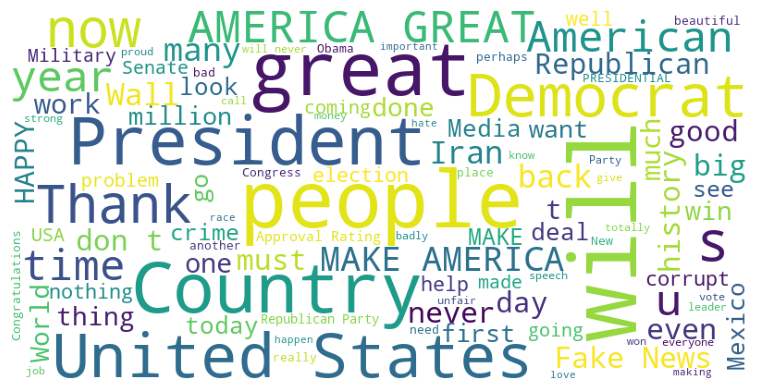

In [27]:
# WordCloud 생성
from wordcloud import WordCloud, STOPWORDS 
wordcloud = WordCloud(width = 800, height = 400, 
                      background_color ='white', 
                      stopwords = set(STOPWORDS), 
                      max_words=100,
                      min_font_size = 10,
                      max_font_size = 100,
                     ).generate(cleaned_text) 
  
# WordCloud 출력                    
plt.figure(figsize = (8, 4), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout() 
plt.show()

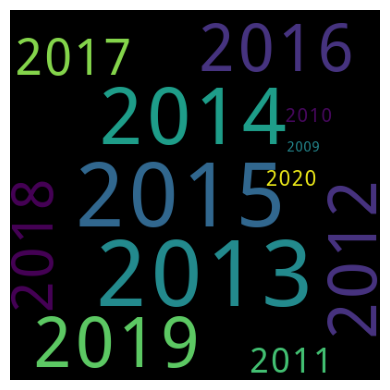

In [28]:
df['year'] = df['date'].map(lambda x:x[:4])
dict_data = df['year'].value_counts()
# print(dict_data)

# WordCloud 생성
from wordcloud import WordCloud, STOPWORDS 

wordcloud = WordCloud(width = 400, height = 400, 
                      background_color ='black', 
                      stopwords = set(STOPWORDS), 
                      max_font_size = 100,
                     ).generate_from_frequencies(dict_data) 
# WordCloud 출력                    
plt.figure(figsize = (4, 4), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout() 
plt.show()

In [29]:
df['retweets'].describe()

count     41122.000000
mean       5455.590657
std       10130.076661
min           0.000000
25%          25.000000
50%         291.000000
75%        8778.000000
max      309892.000000
Name: retweets, dtype: float64

<Axes: >

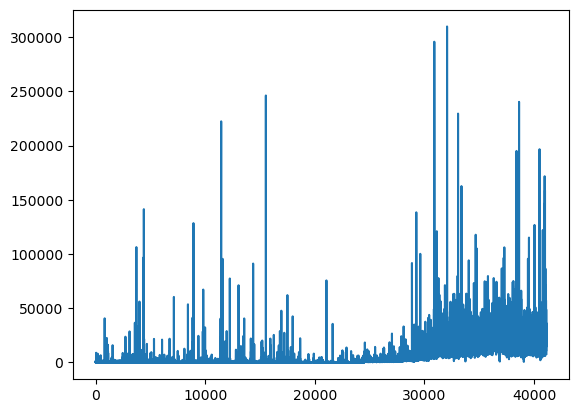

In [30]:
df['retweets'].plot()

In [31]:
df['favorites'].describe()

count     41122.000000
mean      22356.899105
std       41501.859711
min           0.000000
25%          28.000000
50%         247.000000
75%       32970.750000
max      857678.000000
Name: favorites, dtype: float64

<Axes: >

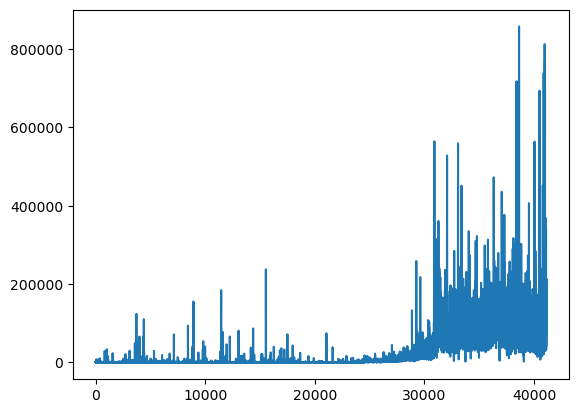

In [32]:
df['favorites'].plot()

In [34]:
# 사용할 컬럼에서 date를 추출해서 년도별로 나누기
use_df = df.loc[:,'date':'favorites']
# use_df
date_li = list(use_df['date'])

for i in range(len(date_li)):
    date_li[i] = date_li[i][:4]

use_df['date'] = date_li 
use_df

,date,retweets,favorites
0,2009,500,868
1,2009,33,273
2,2009,12,18
3,2009,11,24
4,2009,1399,1965
...,...,...,...
41117,2020,32620,213817
41118,2020,36239,149571
41119,2020,16588,66944
41120,2020,20599,81921


In [35]:
#연도별로 리트윗/좋아요 수 확인해보기 
count_retweets = dict()
count_favorites = dict()

count_retweets_li = list(use_df['retweets'])
count_favorites_li = list(use_df['favorites'])


for i in list(use_df['date']):
    count_retweets[i] = 0 
    count_favorites[i] = 0 
for i in range(len(list(use_df['date']))):
    count_retweets[use_df['date'][i]] += count_retweets_li[i]
    count_favorites[use_df['date'][i]] += count_favorites_li[i]
    
print("리트윗 : {}".format(count_retweets))
print('')
print("좋아요 : {}".format(count_favorites))

리트윗 : {'2009': 3889, '2010': 26707, '2011': 240930, '2012': 2179297, '2013': 2715331, '2014': 1808060, '2015': 4570044, '2016': 26165104, '2017': 37155462, '2018': 55805075, '2019': 88449499, '2020': 5225401}

좋아요 : {'2009': 5925, '2010': 25855, '2011': 170173, '2012': 1587226, '2013': 2492672, '2014': 1995800, '2015': 9202542, '2016': 75884066, '2017': 168645479, '2018': 245880299, '2019': 388123797, '2020': 25346571}


{'2009': 3889, '2010': 26707, '2011': 240930, '2012': 2179297, '2013': 2715331, '2014': 1808060, '2015': 4570044, '2016': 26165104, '2017': 37155462, '2018': 55805075, '2019': 88449499, '2020': 5225401}


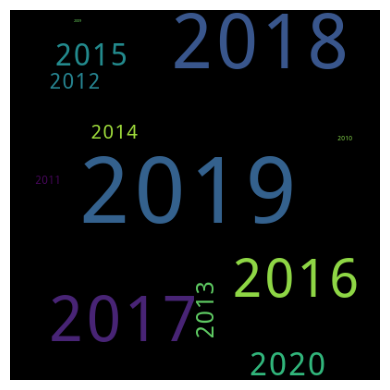

In [36]:
# 리트윗수
dict_data =count_retweets
print(dict_data)
from wordcloud import WordCloud, STOPWORDS 
wordcloud = WordCloud(width = 400, height = 400, 
                      background_color ='black', 
                      stopwords = set(STOPWORDS), 
                      max_font_size = 100,
                     ).generate_from_frequencies(dict_data) 
  
# WordCloud 출력                    
plt.figure(figsize = (4, 4), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout() 
plt.show()

{'2009': 5925, '2010': 25855, '2011': 170173, '2012': 1587226, '2013': 2492672, '2014': 1995800, '2015': 9202542, '2016': 75884066, '2017': 168645479, '2018': 245880299, '2019': 388123797, '2020': 25346571}


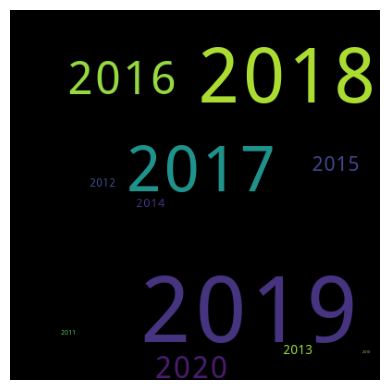

In [45]:
# 좋아요수
dict_data =count_favorites
print(dict_data)
from wordcloud import WordCloud, STOPWORDS 
wordcloud = WordCloud(width = 400, height = 400, 
                      background_color ='black', 
                      stopwords = set(STOPWORDS), 
                      max_font_size = 100,
                     ).generate_from_frequencies(dict_data) 
  
# WordCloud 출력                    
plt.figure(figsize = (4, 4), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout() 
plt.show()


In [38]:
df.loc[:,'retweets':'favorites'].corr()

,retweets,favorites
retweets,1.000000,0.944441
favorites,0.944441,1.000000


<Axes: >

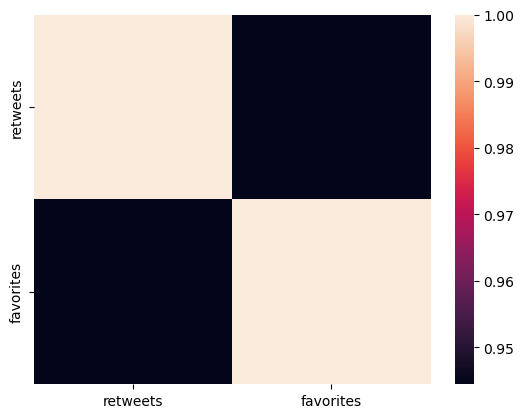

In [39]:
#비슷한 상관계수를 가짐 
sns.heatmap(data = df.loc[:,'retweets':'favorites'].corr())

In [40]:
over100000fav = df[df['favorites'] > 100000]
over200000fav = df[df['favorites'] > 200000]
over300000fav = df[df['favorites'] > 300000]
over400000fav = df[df['favorites'] > 400000]

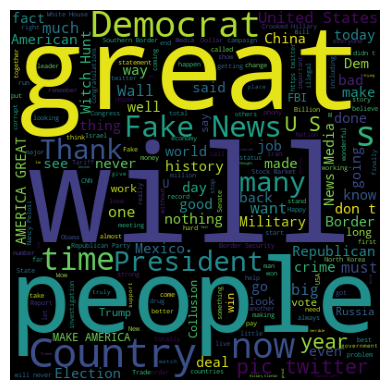

In [41]:
#like 10만개
result7 = ",".join(over100000fav['content'])

# WordCloud 생성
from wordcloud import WordCloud, STOPWORDS 
wordcloud = WordCloud(width = 400, height = 400,  background_color = 'black'
                     ).generate(result7) 
  
# WordCloud 출력                    
plt.figure(figsize = (4, 4), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout() 
plt.show()

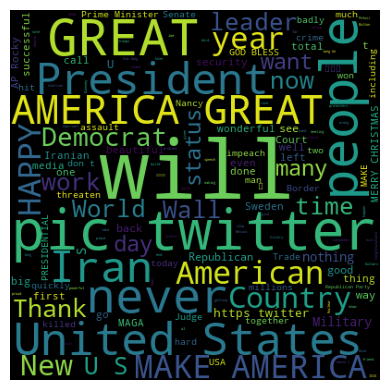

In [42]:
#like 20만개
result = ",".join(over200000fav['content'])

# WordCloud 생성
from wordcloud import WordCloud, STOPWORDS 
wordcloud = WordCloud(width = 400, height = 400,  background_color = 'black'
                     ).generate(result) 
  
# WordCloud 출력                    
plt.figure(figsize = (4, 4), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout() 
plt.show()

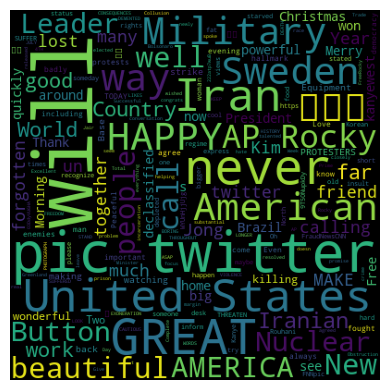

In [43]:
#like 30만개
result = ",".join(over300000fav['content'])

# WordCloud 생성
from wordcloud import WordCloud, STOPWORDS 
wordcloud = WordCloud(width = 400, height = 400,  background_color = 'black'
                     ).generate(result) 
  
# WordCloud 출력                    
plt.figure(figsize = (4, 4), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout() 
plt.show()

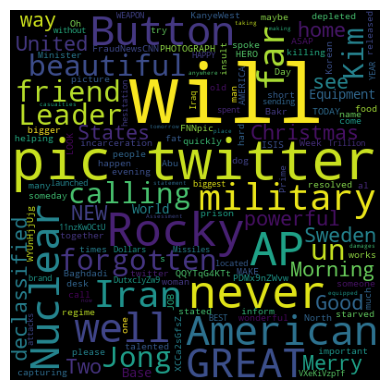

In [44]:
#like 40만개
result = ",".join(over400000fav['content'])

# WordCloud 생성
from wordcloud import WordCloud, STOPWORDS 
wordcloud = WordCloud(width = 400, height = 400,  background_color = 'black'
                     ).generate(result) 
  
# WordCloud 출력                    
plt.figure(figsize = (4, 4), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout() 
plt.show()